# Data

The dataset I am using for this project is named HR analytics and it contains information on the various characteristics of a person’s work and work life such as wage, department, education, number of employees, and so on.  There are 1470 observations and 35 different variables with each of the 1470 observations representing 1 employee.  All values in the dataset for numerical variables are integers but in my table where I characterize each variable I will still treat variables that could hypothetically be considered continuous as such.  For example age only uses integer values in the dataset however if the dataset used exact age we could consider this variable continuous and thus in my table the age variable is labelled: numerical (continuous).  This dataset is from Kaggle and is based on an extremely similar dataset named IBM HR Analytics Employee Attrition & Performance which is a dataset that was created by IBM data scientists based on fictitious employees.



In [1]:
#Loading in neccessary packages
library(tidyverse)
library(broom)
library(dplyr)
library(lubridate)

#Creating descriptions for all variables
input <- c("Age", "age of employee", "numerical (continuous)", "NA",
"Attrition", "employee is leaving the company", "categorical", "yes, no",
"BusinessTravel", "how frequently an employee travels for work", "categorical", "Travel_Rarely, Travel_frequently",
"DailyRate", "employee's daily wage", "numerical (continuous)", "NA",
"Department", "what department the employee resides in", "categorical", "Research & Development, Sales, Human Resources",
"DistanceFromHome", "employee's distance from work to home", "numerical (continuous)", "NA",
"Education", "qualification of employee's education", "categorical", "1=below college, 2=college, 3=bachelor, 4=master, 5=doctor",
"EducationField", "type of education of employee", "categorical", "Human Resources, Medical, Marketing, Life Sciences, Technical Degree, Other",
"EmployeeCount", "represents the employee themself", "NA (all 1s)", "NA",
"EmployeeNumber", "employee id number", "NA (1-2068)", "NA",
"EnvironmentSatisfaction", "Satisfaction with work environment", "categorical", "1=low, 2=medium, 3=high, 4=very high",
"Gender", "gender of employee", "categorical", "male, female",
"HourlyRate", "hourly wage of employee", "numerical (continuous)", "NA",
"JobInvolvement", "Involvement of employee on the job", "categorical", "1=low, 2=medium, 3=high, 4=very high",
"JobLevel", "level of employee's job", "categorical", "1 2 3 4 5 (no context for numbers included)",
"JobRole", "Role of employee", "categorical", "Sales Executive, Research Scientist, Laboratory Technician, Manufacturing Director, Healthcare Representative, Manager, Sales Representative, Research Director, Human Resources",
"JobSatisfaction", "employee's satisfaction with job", "categorical", "1=low, 2=medium, 3=high, 4=very high",
"MaritalStatus", "employee's marital status", "categorical", "Single, Married, Divorced",
"MonthlyIncome", "employee's monthly salary", "numerical (continuous)", "NA",
"MonthlyRate", "monthly wage of employee", "numerical (continuous)", "NA",
"NumCompaniesWorked", "how many companies the employee has worked at", "numerical (discrete)", "NA",
"Over18", "is employee over the age of 18", "categorical", "Y=Yes, N=No",
"OverTime", "Does the employee work overtime", "categorical", "Yes, No",
"PercentSalaryHike", "percentage increase in employee's salary", "numerical (continuous)", "NA",
"PerformanceRating", "how well the employee performed at their job", "categorical", "1=low, 2=good, 3=excellent, 4=outstanding",
"RelationshipSatisfaction", "employee's satisfaction with their current relationship", "categorical", "1=low, 2=medium, 3=high, 4=very high",
"StandardHours", "employee's standard number of work hours over a 2 week period", "numerical (continuous)", "NA",
"StockOptionLevel", "Level of employee's stock options", "categorical", "0, 1, 2, 3 (no context for numbers included)",
"TotalWorkingYears", "total years employee has worked", "numerical (continuous)", "NA",
"TrainingTimesLastYear", "amount of hours employee spent training last year", "numerical (continuous)", "NA",
"WorkLifeBalance", "employee's time spent between work versus doing things outside of work", "categorical", "1=bad, 2=good, 3=better, 4=best",
"YearsAtCompany", "employee's number of years worked at their current company", "numerical (continuous)", "NA",
"YearsInCurrentRole", "employee's number of years worked in their current role", "numerical (continuous)", "NA",
"YearsSinceLastPromotion", "number of years since employee was last promoted", "numerical (continuous)", "NA",
"YearsWithCurrManager", "number of years employee has worked with the current manager (continuous)", "numerical", "NA")

#Putting descriptions into a table
df <- matrix(input, ncol = 4, byrow = TRUE) %>% 
  as_tibble() 

#Naming the columns of my table
colnames(df) <- c("Variable Name", "Variable Description", "Variable Type", "Levels of Variable (If Categorical)")

df

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
“The `x` argument of `as_tibble.matrix()` must have unique column names if
`.name_repair` is omitted as of tibble 2.0.0.
ℹ Using compatibility `.name_repair`.”


Variable Name           
1  Age                     
2  Attrition               
3  BusinessTravel          
4  DailyRate               
5  Department              
6  DistanceFromHome        
7  Education               
8  EducationField          
9  EmployeeCount           
10 EmployeeNumber          
11 EnvironmentSatisfaction 
12 Gender                  
13 HourlyRate              
14 JobInvolvement          
15 JobLevel                
16 JobRole                 
17 JobSatisfaction         
18 MaritalStatus           
19 MonthlyIncome           
20 MonthlyRate             
21 NumCompaniesWorked      
22 Over18                  
23 OverTime                
24 PercentSalaryHike       
25 PerformanceRating       
26 RelationshipSatisfaction
27 StandardHours           
28 StockOptionLevel        
29 TotalWorkingYears       
30 TrainingTimesLastYear   
31 WorkLifeBalance         
32 YearsAtCompany          
33 YearsInCurrentRole      
34 YearsSinceLastPromotion 
35 YearsWithCurrManager    
   Variable Description                                                     
1  age of employee                                                          
2  employee is leaving the company                                          
3  how frequently an employee travels for work                              
4  employee's daily wage                                                    
5  what department the employee resides in                                  
6  employee's distance from work to home                                    
7  qualification of employee's education                                    
8  type of education of employee                                            
9  represents the employee themself                                         
10 employee id number                                                       
11 Satisfaction with work environment                                       
12 gender of employee                                                       
13 hourly wage of employee                                                  
14 Involvement of employee on the job                                       
15 level of employee's job                                                  
16 Role of employee                                                         
17 employee's satisfaction with job                                         
18 employee's marital status                                                
19 employee's monthly salary                                                
20 monthly wage of employee                                                 
21 how many companies the employee has worked at                            
22 is employee over the age of 18                                           
23 Does the employee work overtime                                          
24 percentage increase in employee's salary                                 
25 how well the employee performed at their job                             
26 employee's satisfaction with their current relationship                  
27 employee's standard number of work hours over a 2 week period            
28 Level of employee's stock options                                        
29 total years employee has worked                                          
30 amount of hours employee spent training last year                        
31 employee's time spent between work versus doing things outside of work   
32 employee's number of years worked at their current company               
33 employee's number of years worked in their current role                  
34 number of years since employee was last promoted                         
35 number of years employee has worked with the current manager (continuous)
   Variable Type         
1  numerical (continuous)
2  categorical           
3  categorical           
4  numerical (continuous)
5  categorical           
6  numerical (continuous)
7  categorical           
8  categorical 

# Question

* Note: Originally I had daily wage as the response and gender and age as my only explanatory variables, however the following is my updated version which has monthly salary as the reponse instead of daily wage and also includes 2 extra controls which are education and worklife balance .  It is also now additive instead of interactive and gender will now be another control and age will be the main explanatory variable being looked at.

The question I will ask is: Is an employee's monthly salary associated with their age when controlling for gender, level of education, and work life balance?  The question’s focus is on inference as I am using this relatively small dataset of 1470 observations to try and determine if there is a relationship between monthly salary and age when controlling for gender, education, and worklife balance and to see if this relationship can be generalized to the whole world.

# Cleaned Data

In [2]:
#Adding appropriate packages
library(tidyverse)
library(leaps) #For regsubsets

#Reading in dataset
data <- read.csv("Group_Project/HR_Analytics-G14/Data/HR-Employee-Attrition.csv")
head(data)

Age Attrition BusinessTravel    DailyRate Department            
1 41  Yes       Travel_Rarely     1102      Sales                 
2 49  No        Travel_Frequently  279      Research & Development
3 37  Yes       Travel_Rarely     1373      Research & Development
4 33  No        Travel_Frequently 1392      Research & Development
5 27  No        Travel_Rarely      591      Research & Development
6 32  No        Travel_Frequently 1005      Research & Development
  DistanceFromHome Education EducationField EmployeeCount EmployeeNumber ⋯
1 1                2         Life Sciences  1             1              ⋯
2 8                1         Life Sciences  1             2              ⋯
3 2                2         Other          1             4              ⋯
4 3                4         Life Sciences  1             5              ⋯
5 2                1         Medical        1             7              ⋯
6 2                2         Life Sciences  1             8              ⋯
  RelationshipSatisfaction StandardHours StockOptionLevel TotalWorkingYears
1 1                        80            0                 8               
2 4                        80            1                10               
3 2                        80            0                 7               
4 3                        80            0                 8               
5 4                        80            1                 6               
6 3                        80            0                 8               
  TrainingTimesLastYear WorkLifeBalance YearsAtCompany YearsInCurrentRole
1 0                     1                6             4                 
2 3                     3               10             7                 
3 3                     3                0             0                 
4 3                     3                8             7                 
5 3                     3                2             2                 
6 2                     2                7             7                 
  YearsSinceLastPromotion YearsWithCurrManager
1 0                       5                   
2 1                       7                   
3 0                       0                   
4 3                       0                   
5 2                       2                   
6 3                       6

In [3]:
# Here I am just ensuring all categorical variables are treated as factors
data$Attrition <- as.factor(data$Attrition)
data$BusinessTravel <- as.factor(data$BusinessTravel)
data$Department <- as.factor(data$Department)
data$EducationField <- as.factor(data$EducationField)
data$Education <- as.factor(data$Education)
data$EnvironmentSatisfaction <- as.factor(data$EnvironmentSatisfaction)
data$Gender <- as.factor(data$Gender)
data$JobInvolvement <- as.factor(data$JobInvolvement)
data$JobLevel <- as.factor(data$JobLevel)
data$JobRole <- as.factor(data$JobRole)
data$JobSatisfaction <- as.factor(data$JobSatisfaction)
data$MaritalStatus <- as.factor(data$MaritalStatus)
data$OverTime <- as.factor(data$OverTime)
data$PerformanceRating <- as.factor(data$PerformanceRating)
data$RelationshipSatisfaction <- as.factor(data$RelationshipSatisfaction)
data$StockOptionLevel <- as.factor(data$StockOptionLevel)
data$WorkLifeBalance <- as.factor(data$WorkLifeBalance)

#Here I am removing these 4 variables that do not give any insight
data <- select(data, -StandardHours, -EmployeeCount, -Over18, -EmployeeNumber)

#Displaying new version of data
head(data)

Age Attrition BusinessTravel    DailyRate Department            
1 41  Yes       Travel_Rarely     1102      Sales                 
2 49  No        Travel_Frequently  279      Research & Development
3 37  Yes       Travel_Rarely     1373      Research & Development
4 33  No        Travel_Frequently 1392      Research & Development
5 27  No        Travel_Rarely      591      Research & Development
6 32  No        Travel_Frequently 1005      Research & Development
  DistanceFromHome Education EducationField EnvironmentSatisfaction Gender ⋯
1 1                2         Life Sciences  2                       Female ⋯
2 8                1         Life Sciences  3                       Male   ⋯
3 2                2         Other          4                       Male   ⋯
4 3                4         Life Sciences  4                       Female ⋯
5 2                1         Medical        1                       Male   ⋯
6 2                2         Life Sciences  4                       Male   ⋯
  PerformanceRating RelationshipSatisfaction StockOptionLevel TotalWorkingYears
1 3                 1                        0                 8               
2 4                 4                        1                10               
3 3                 2                        0                 7               
4 3                 3                        0                 8               
5 3                 4                        1                 6               
6 3                 3                        0                 8               
  TrainingTimesLastYear WorkLifeBalance YearsAtCompany YearsInCurrentRole
1 0                     1                6             4                 
2 3                     3               10             7                 
3 3                     3                0             0                 
4 3                     3                8             7                 
5 3                     3                2             2                 
6 2                     2                7             7                 
  YearsSinceLastPromotion YearsWithCurrManager
1 0                       5                   
2 1                       7                   
3 0                       0                   
4 3                       0                   
5 2                       2                   
6 3                       6

# Visualisations and Justifications

Warning message in geom_vline(aes(xintercept = mean, color = "mean", show.legend = TRUE)):
“Ignoring unknown aesthetics: show.legend”


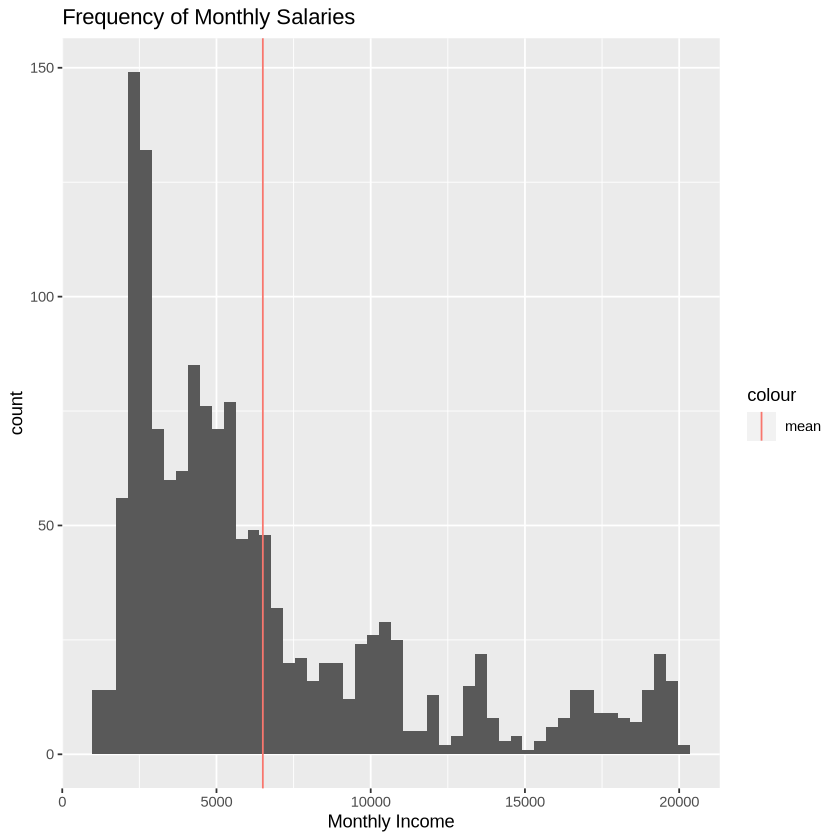

In [4]:
mean = mean(data$MonthlyIncome)

monthly_salary_frequency <- ggplot(data, aes(MonthlyIncome)) +
geom_histogram(bins=50) + 
xlab("Monthly Income") +
ggtitle("Frequency of Monthly Salaries") +
geom_vline(aes(xintercept=mean, color="mean", show.legend=TRUE))


monthly_salary_frequency

This plot shows all the monthly salaries for all observations as well as the mean of the monthly salaries.  This is relevant as it gives the reader an idea of what the response variable looks like and how it is distributed. This benefits the reader because now they understand the relative size of the response variable which will better contextualize the coefficients of the predictors when regression is performed.  Here we see the monthly salaries are somewhat right skewed and range from around 1000 to 20000 with a mean of approximately 6500.

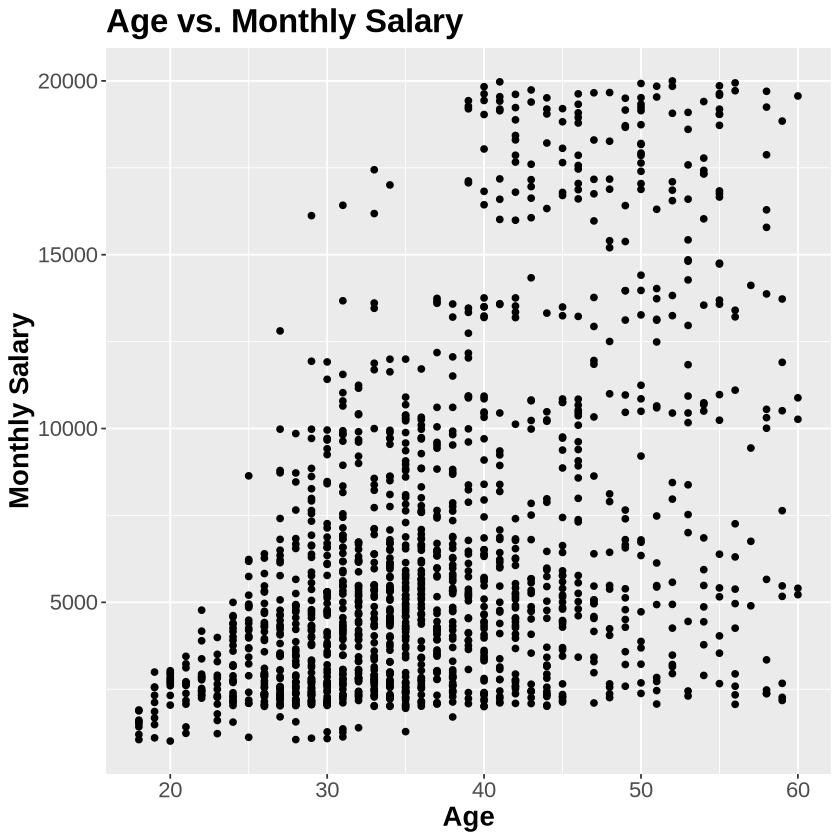

In [5]:
Age_monthlyincome_plot <- ggplot(data, aes(
  Age,
  MonthlyIncome
)) +
  geom_point() +
  labs(
    title = "Age vs. Monthly Salary",
    x = "Age",
    y = "Monthly Salary"
  ) +
  theme(
    text = element_text(size = 16.5),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    legend.title = element_text(face = "bold"),
  )
Age_monthlyincome_plot

This plot shows the association between age and monthly salary which is relevant since this is the main relationship we are trying to infer.  As for what we see, there appears to be a somewhat positive relationship between the 2 variables or in other words, on average as your age increases there is an associated increase in your monthly salary.  While this gives us a good starting point for insight into our research question, we don't account for our controls in this visualisation and so we still do not know if this relationship would hold with controls present.

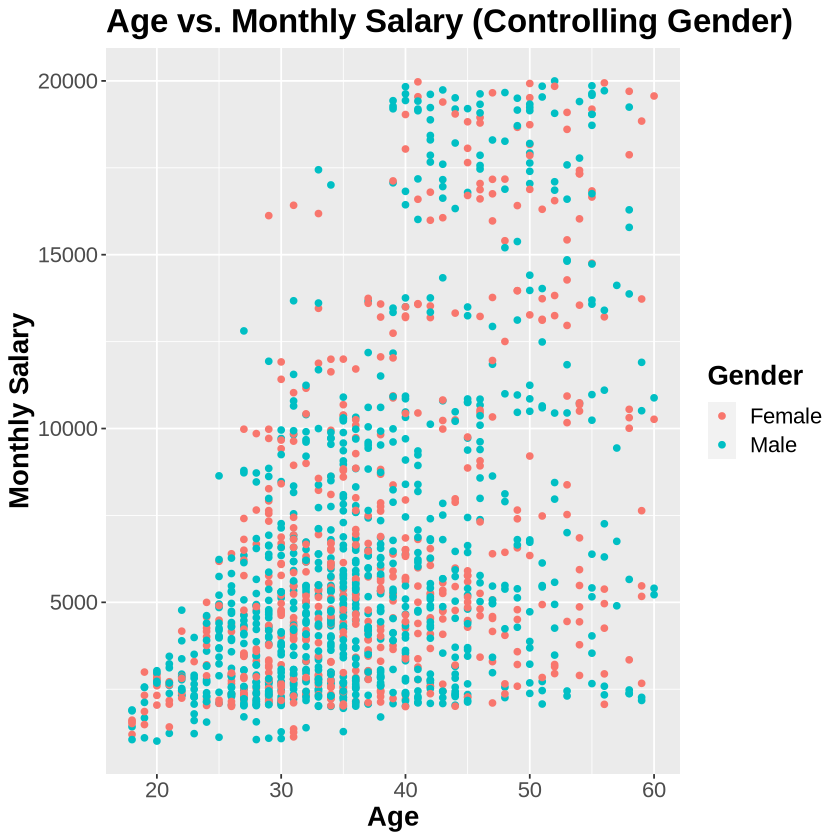

In [6]:
Age_monthlyincome_plot <- ggplot(data, aes(
  Age,
  MonthlyIncome,
    color=Gender
)) +
  geom_point() +
  labs(
    title = "Age vs. Monthly Salary (Controlling Gender)",
    x = "Age",
    y = "Monthly Salary"
  ) +
  theme(
    text = element_text(size = 16.5),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    legend.title = element_text(face = "bold"),
  )
Age_monthlyincome_plot

This plot once again provides a visualisation of the relation between age and monthly salary, however it adds relevance as it also considers the gender of all the observations in order to examine whether gender may be confounding our relationship.  Here it does not appear that gender plays much of a role in confounding our relationship as the males and females seem to be similarly distributed in terms of both age and monthly salary.

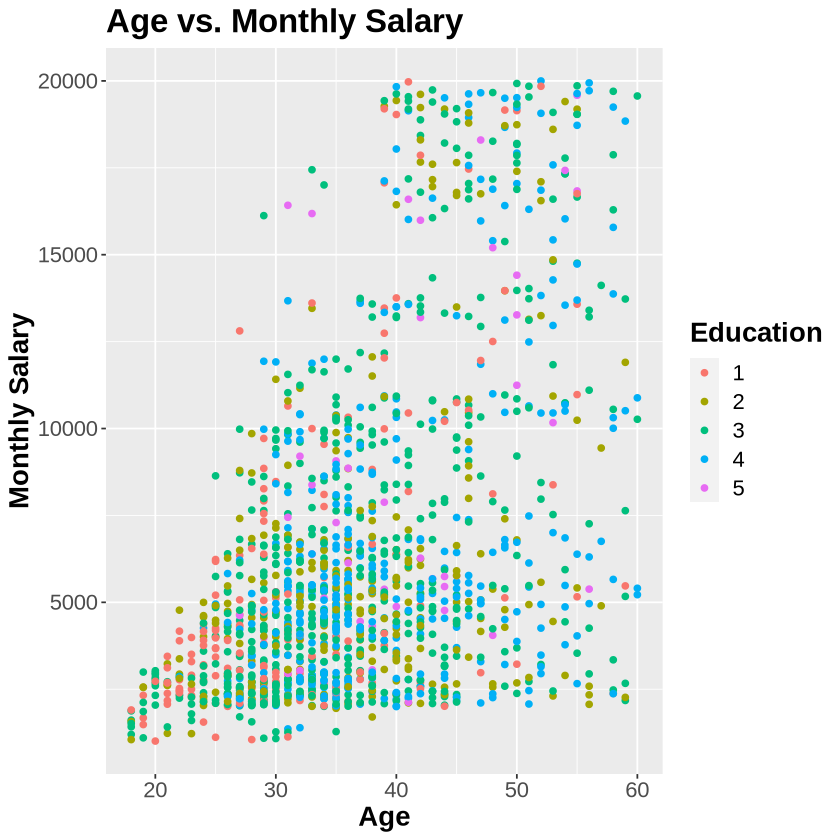

In [7]:
Age_monthlyincome_plot <- ggplot(data, aes(
  Age,
  MonthlyIncome,
    color=Education
)) +
  geom_point() +
  labs(
    title = "Age vs. Monthly Salary",
    x = "Age",
    y = "Monthly Salary"
  ) +
  theme(
    text = element_text(size = 16.5),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    legend.title = element_text(face = "bold"),
  )
Age_monthlyincome_plot

This is a similar plot, but once again we add relevance by considering another one of our controls which is education.  Unlike the plot that considered the control of gender, this plot controlling for education may actually be confounding our result as it appears that on average the lower your education level the younger you are and the lower your monthly salary is.  For example you can see that a lot of the red labelled education points for below college are focused in the bottom left corner meaning that these people are generally younger on average and earning less salary a month on average.  Meanwhile the pink dots for doctorate appear to be more focused in the top right of the plot meaning that these people are generally older on average and earning more salary a month on average.

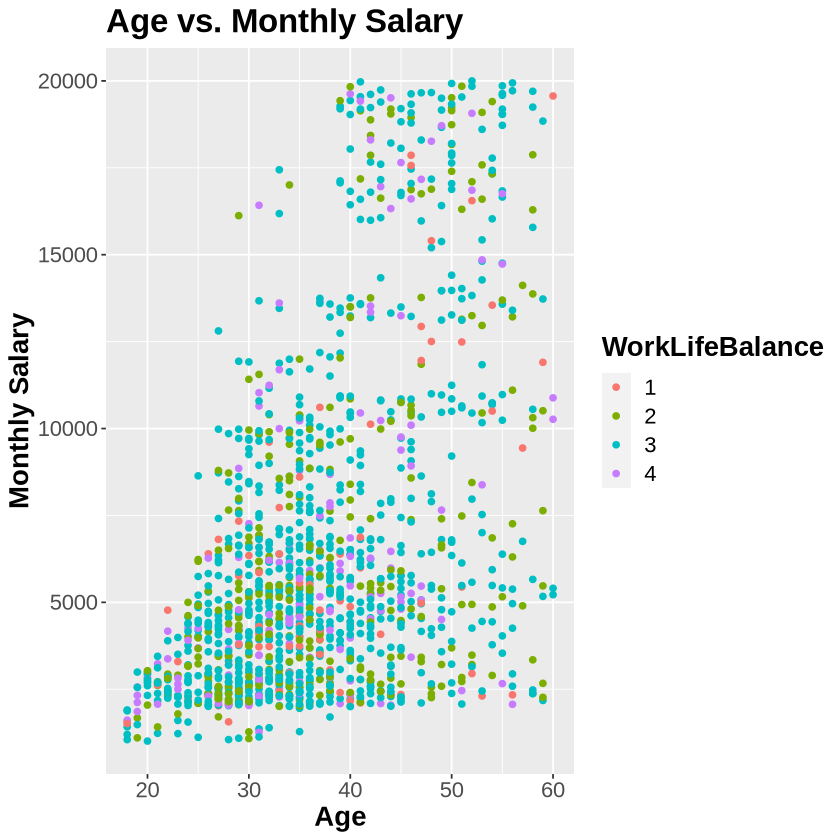

In [8]:
Age_monthlyincome_plot <- ggplot(data, aes(
  Age,
  MonthlyIncome,
    color=WorkLifeBalance
)) +
  geom_point() +
  labs(
    title = "Age vs. Monthly Salary",
    x = "Age",
    y = "Monthly Salary"
  ) +
  theme(
    text = element_text(size = 16.5),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    legend.title = element_text(face = "bold"),
  )
Age_monthlyincome_plot

One final plot does the same as the last two but adds relevance by looking at the final control of worklife balance and how it affects this relationship.  Similar to the plot looking at the control of gender it appears that worklife balance does not affect monthly salary in any meaningful way.  In other words regardless of one's worklife balance the observations appear to be similarly distributed in terms of both age and monthly salary.

# Methods and Plan

For this project I am going to use multiple linear regression in order to answer the question of whether monthly income is affected by age when controlling for gender, education, and work life balance.  The regression will be additive and I will use MonthlyIncome as the response variable and Age, Gender, Education, and WorkLifeBalance as the explanatory variables and then based on the coefficient of the Age explanatory variable I can determine whether it significantly correlates with an increase or decrease in the MonthlyIncome (the Gender, Education, and WorkLifeBalance variables may have significant coefficients however they are simply there as controls to ensure they are not having an effect on both the age and MonthlyIncome variables).  For the age variable it is numerical and continuous so it will simply indicate for each year you get older how is your monthly salary changing (if coefficient were 2 this would mean on average, every year you get older your monthly salary increases by 2 dollars). For the controls, since gender is a categorical variable there will be a dummy variable for gender that will be 1 for males and 0 for females. Education is also a categorical variable but it has 5 levels so there will be 4 dummy variables with the base level being below college and the 4 dummies being for college, bachelors, masters, and doctorate. Finally, worklife balance is also a categorical variable and it has 4 levels so there will be 3 dummy variables with the base level being bad and the 3 dummies being for good, better, and best.  This method of an additive multiple linear regression is appropriate here as it allows for an easy interpretation of age’s association with monthly income.  It is also appropriate due to the fact that there are many variables that would affect monthly income so we need to use multiple linear regression in order to account for multiple variables and using simple linear regression would be insufficient.  The assumptions that will be required for this regression are: that the relation between these variables is linear, the errors are independent, the conditional distribution of the error terms is normal, the error terms have equal variance, and there is no multicollinearity.  One potential limitation of this method is that since we are using real world data at least one of these required assumptions will more than likely not be fully met in which case the linear regression will be biased and the regression will not be meaningful.  One other limitation of this model is that if the data has any extreme outliers, this could skew the regression in which case it may seem that the association that we find is more or less significant than it actually is.


# Implementation of a Proposed Model

In [9]:
#Creating different models based on the explanatory variables described in methods and plan
model.1 <- lm(MonthlyIncome ~ 1, data=data)
model.2 <- lm(MonthlyIncome ~ Age, data=data)
model.3 <- lm(MonthlyIncome ~ Age+Education, data=data)
model.4 <- lm(MonthlyIncome ~ Age+Education+WorkLifeBalance, data=data)
model.5 <- lm(MonthlyIncome ~ Age+Education+Gender, data=data)

#comparing these nested models to see which one should be used based on the F-test (With significance 0.1)
anova(model.1, model.2)
anova(model.2,model.3)
anova(model.3,model.4)
anova(model.3,model.5)

Res.Df RSS         Df Sum of Sq  F        Pr(>F)      
1 1469   32560175038 NA         NA       NA           NA
2 1468   24489837084  1 8070337954 483.7621 6.669539e-93

Res.Df RSS         Df Sum of Sq F        Pr(>F)    
1 1468   24489837084 NA        NA       NA         NA
2 1464   24358433409  4 131403675 1.974419 0.09600431

Res.Df RSS         Df Sum of Sq F        Pr(>F)   
1 1464   24358433409 NA       NA        NA        NA
2 1461   24293597265  3 64836145  1.299734 0.2729897

Res.Df RSS         Df Sum of Sq F         Pr(>F)   
1 1464   24358433409 NA      NA          NA        NA
2 1463   24352717842  1 5715568   0.3433652 0.5579836

In [10]:
#The model using only age and education appears to be the most useful based on the ANOVA tests
#This was selected using forward selection and a significance level of 0.1 for the F-test
#which variables to start with were based on the visualisations above
MLR_monthly_income <- lm(MonthlyIncome ~ Age+Education, data=data)

#Looking at the cleaned results of the regression to see what each individual variable looks like
#(This is my 1 table/visualisation)
tidy(MLR_monthly_income)

term        estimate   std.error statistic  p.value     
1 (Intercept) -2731.8717 496.25661 -5.5049578 4.354131e-08
2 Age           260.2990  11.97664 21.7338928 5.326406e-91
3 Education2   -636.5488 400.04714 -1.5911846 1.117839e-01
4 Education3   -246.3187 360.04164 -0.6841395 4.939954e-01
5 Education4   -660.6391 383.32985 -1.7234220 8.502338e-02
6 Education5    624.6701 673.10948  0.9280365 3.535416e-01

# Interpretation of the Results
After comparing different models with ANOVA and using different combinations of my explanatory variables, the best model appears to be the one which only uses age and education as explanatory variables and excludes the explanatory variables of gender and worklife balance as they do not significantly contribute to the regression.  What is found from the best selected regression is that age is significantly associated with monthly salary and the relationship between the two is positive (as age increases there is an associated increase in monthly income).  More specifically these results show that for every year you get older there is an associated increase in monthly salary of approximately $260.30.  Finally this result shows that this association holds even when controlling for education, gender, and worklife balance as education was included in the regression to control for it (education has quite a small effect anyway as only 1 of the 4 education dummy variables is even significant using an alpha of 0.1) and gender and worklife balance are already being controlled for due to the fact that they do not signficantly change the regression when they are included as explanatory variables.